# Question 3

# Introduction

In the following, CRISP-DM process will be applied for a finding an insight about the charactistics of visitors of StackOverflow based on their behaviours.

# Step 1 Business Understanding

The business question defined is: 
## How could Stack Overflow segment their visitors according their behaviours on the platform?


Check out current python version

In [34]:
import sys
print(sys.version)

3.6.3 | packaged by conda-forge | (default, Dec  9 2017, 04:28:46) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]


# Step 2 Data Understanding

Import libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import proj1_func_library as my_lib
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
%matplotlib inline

Read the datasets

In [37]:
df = pd.read_csv('developer_survey_2020/survey_results_public.csv')
schema = pd.read_csv('developer_survey_2020/survey_results_schema.csv')

df.shape, schema.shape

((64461, 61), (61, 2))

In [38]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


To review some data of survey data

In [39]:
pd.set_option("display.max_columns", None)

df.head(3)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN


To review the null value population

In [40]:
df.isnull().mean().sort_values()

Respondent                      0.000000
Hobbyist                        0.000698
MainBranch                      0.004638
Country                         0.006035
Employment                      0.009417
NEWSOSites                      0.095965
Age1stCode                      0.101782
YearsCode                       0.105133
EdLevel                         0.109058
LanguageWorkedWith              0.109880
NEWOtherComms                   0.112564
SOVisitFreq                     0.116210
SOAccount                       0.118769
SOComm                          0.123873
OpSys                           0.127721
NEWLearn                        0.128838
NEWStuck                        0.147035
NEWPurpleLink                   0.149827
LanguageDesireNextYear          0.160531
PlatformWorkedWith              0.164720
NEWCollabToolsWorkedWith        0.179612
WelcomeChange                   0.182715
SurveyEase                      0.196382
JobSeek                         0.197546
SurveyLength    

To review some data of schema data

In [41]:
schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


## Deeper data understanding by exploratory data analysis (EDA)

Hobbyist  =  Do you code as a hobby?


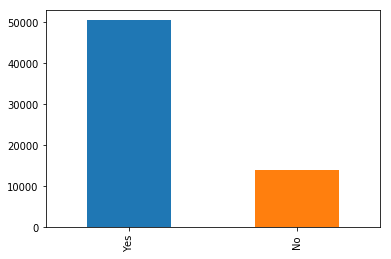

In [42]:
my_lib.print_var_desc_counts_plot(schema, df, "Hobbyist")

#### Almost all of respondents who code as their hobby. Obsviously most IT geeks entering to IT fields for hobby.

NEWLearn  =  How frequently do you learn a new language or framework?


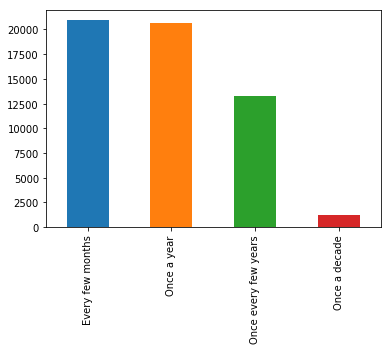

In [9]:
my_lib.print_var_desc_counts_plot(schema, df, "NEWLearn")

#### The number of respondents who learn new languages every few months and once a year is totally 40,000. It is over 2/3 of respondents.

#### The rest of 1/4 respondents only learn new language once every few years or a decade. 

#### This observation shows that most of respondents keep learning new language or framework frequently. 

NEWOtherComms  =  Are you a member of any other online developer communities?


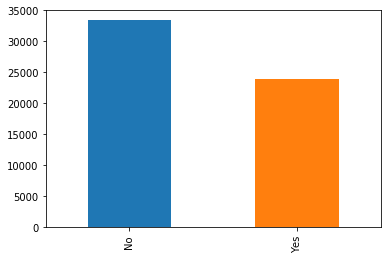

In [10]:
my_lib.print_var_desc_counts_plot(schema, df, "NEWOtherComms")

#### Most people don't have membership of any other online developer communities. But there are still half of people have it.

SOComm  =  Do you consider yourself a member of the Stack Overflow community?


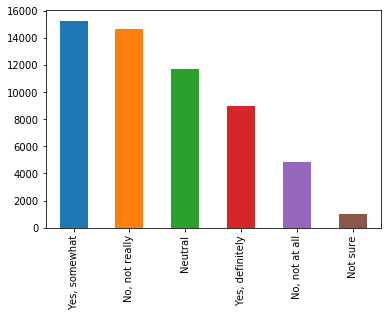

In [11]:
my_lib.print_var_desc_counts_plot(schema, df, "SOComm")

#### This finding is kind of interesting. The top two options are "Yes" , "No" and "Neutral". The population is high.

SOPartFreq  =  How frequently would you say you participate in Q&A on Stack Overflow? By participate we mean ask, answer, vote for, or comment on questions.


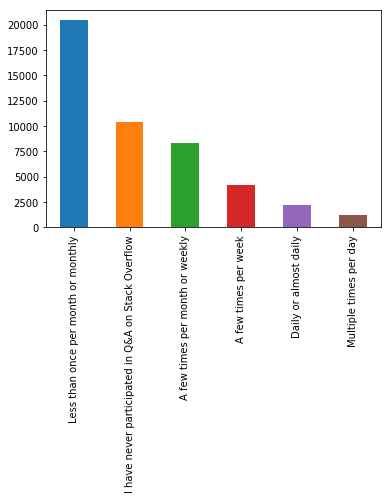

In [12]:
my_lib.print_var_desc_counts_plot(schema, df, "SOPartFreq")

#### There are 1/4 people have never participated in Q&A. And the rest of people have participated at least once per month.

SOVisitFreq  =  How frequently would you say you visit Stack Overflow?


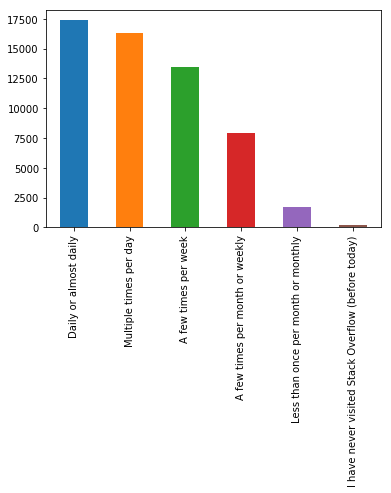

In [13]:
my_lib.print_var_desc_counts_plot(schema, df, "SOVisitFreq")

#### This observation seems favors to Stack Overflow because only a very little of people have never visited Stack Overflow. And most people visit Stack Overflow daily of more than one time in a day.

# Step 3 Data Preparation

### Extract the features that will be applied to the model

There are six features to be applied for this analysis.

In [14]:
features = ["Hobbyist", "NEWLearn", "NEWOtherComms", "SOComm", "SOPartFreq", "SOVisitFreq"]
x_processing = df[features]
x_processing.describe()

,Hobbyist,NEWLearn,NEWOtherComms,SOComm,SOPartFreq,SOVisitFreq
count,64416,56156,57205,56476,46792,56970
unique,2,4,2,6,6,6
top,Yes,Every few months,No,"Yes, somewhat",Less than once per month or monthly,Daily or almost daily
freq,50388,20938,33367,15273,20432,17372


### Handle missing values 

#### To see the population of missing values in dataset.

In [15]:
x_processing.isnull().mean().sort_values()

Hobbyist         0.000698
NEWOtherComms    0.112564
SOVisitFreq      0.116210
SOComm           0.123873
NEWLearn         0.128838
SOPartFreq       0.274104
dtype: float64

#### The population is not that high, it should be okay to drop all instances with missing values.

In [16]:
x_processing = x_processing.dropna()
x_processing.isnull().mean().sort_values()

Hobbyist         0.0
NEWLearn         0.0
NEWOtherComms    0.0
SOComm           0.0
SOPartFreq       0.0
SOVisitFreq      0.0
dtype: float64

In [17]:
x_processing.shape

(42850, 6)

#### Handle SOComm - to drop all rows with value 'Not sure'

In [18]:
len(x_processing[x_processing.SOComm == 'Not sure'])

600

In [19]:
x_processing = x_processing[x_processing.SOComm != 'Not sure']
x_processing.shape

(42250, 6)

### Handle categorical  values 

Seems these categorical variables are all rankable. They can all be converted to to ordinal variables.

#### Hobbyist

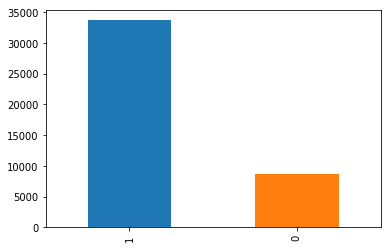

In [20]:
my_lib.conv_cat_to_ord(x_processing, 'Hobbyist', {'Yes':1, 'No':0}, True)

#### NEWLearn

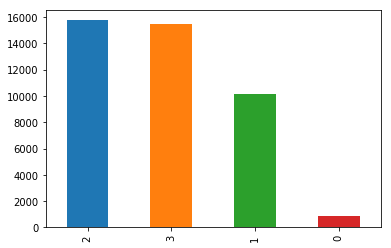

In [21]:
mapping = {
        "Once a decade":0,
        "Once every few years":1,
        "Once a year":2,
        "Every few months":3
}

my_lib.conv_cat_to_ord(x_processing, 'NEWLearn', mapping, True)

#### NEWOtherComms

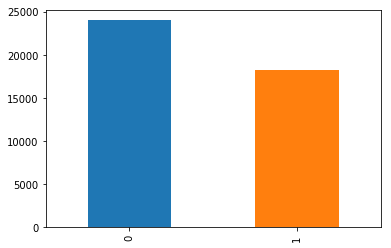

In [22]:
my_lib.conv_cat_to_ord(x_processing, 'NEWOtherComms', {'Yes':1, 'No':0}, True)

#### SOComm

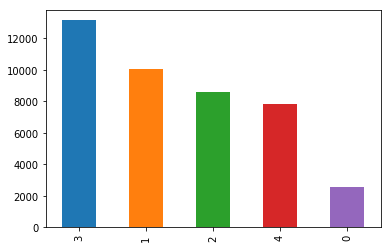

In [23]:
mapping = {
        "No, not at all":0,
        "No, not really":1,
        "Neutral":2,
        "Yes, somewhat":3,
        "Yes, definitely":4,
}

my_lib.conv_cat_to_ord(x_processing, 'SOComm', mapping, True)

#### SOPartFreq

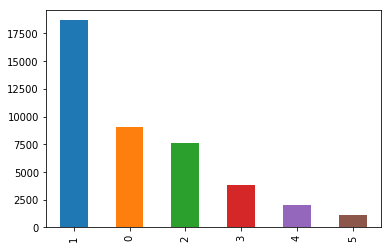

In [24]:
mapping = {
        "I have never participated in Q&A on Stack Overflow":0,
        "Less than once per month or monthly":1,
        "A few times per month or weekly":2,
        "A few times per week":3,
        "Daily or almost daily":4,
        "Multiple times per day":5
}

my_lib.conv_cat_to_ord(x_processing, 'SOPartFreq', mapping, True)

#### SOVisitFreq

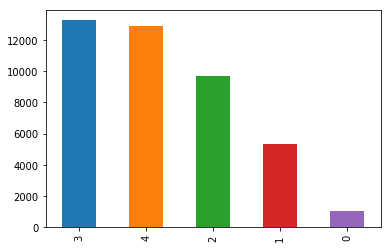

In [25]:
mapping = {
        "Less than once per month or monthly":0,
        "A few times per month or weekly":1,
        "A few times per week":2,
        "Daily or almost daily":3,
        "Multiple times per day":4
}

my_lib.conv_cat_to_ord(x_processing, 'SOVisitFreq', mapping, True)

In [26]:
x_processing.describe()

,Hobbyist_ord,NEWLearn_ord,NEWOtherComms_ord,SOComm_ord,SOPartFreq_ord,SOVisitFreq_ord
count,42250.000000,42250.000000,42250.00000,42250.000000,42250.000000,42250.000000
mean,0.796450,2.084047,0.43200,2.321704,1.393941,2.748876
std,0.402643,0.825700,0.49536,1.196631,1.201722,1.094567
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.00000,1.000000,1.000000,2.000000
50%,1.000000,2.000000,0.00000,2.000000,1.000000,3.000000
75%,1.000000,3.000000,1.00000,3.000000,2.000000,4.000000
max,1.000000,3.000000,1.00000,4.000000,5.000000,4.000000


# Step 4 Modeling

In this secion, K-means clustering algorithm will be applied to segment the visitors into different groups.

### Scale the X variables

In [27]:
x = scale(x_processing[["Hobbyist_ord", "NEWLearn_ord", "NEWOtherComms_ord", "SOPartFreq_ord", "SOVisitFreq_ord", "SOComm_ord"]])
x

array([[-1.97807753, -0.10179039, -0.87210285, -0.32781761,  1.14304453,
         1.40253444],
       [ 0.50554136, -2.52400612, -0.87210285,  0.50433175,  0.22943062,
         0.56684481],
       [ 0.50554136, -0.10179039,  1.14665375,  0.50433175,  1.14304453,
         1.40253444],
       ..., 
       [-1.97807753, -0.10179039,  1.14665375, -0.32781761,  1.14304453,
         0.56684481],
       [ 0.50554136,  1.10931748, -0.87210285, -0.32781761,  0.22943062,
        -1.10453444],
       [ 0.50554136,  1.10931748,  1.14665375, -0.32781761, -2.51141112,
         0.56684481]])

### Use elbow method to determine the optimal number of K clusters.

k= 1 , km.inertia_= 253500.0
k= 2 , km.inertia_= 204961.38766
k= 3 , km.inertia_= 170547.792004
k= 4 , km.inertia_= 146889.749106
k= 5 , km.inertia_= 135534.904372
k= 6 , km.inertia_= 125888.568435
k= 7 , km.inertia_= 118236.870694
k= 8 , km.inertia_= 110469.703384
k= 9 , km.inertia_= 104639.325649
k= 10 , km.inertia_= 99522.5117239
k= 11 , km.inertia_= 94144.7923211
k= 12 , km.inertia_= 89823.8236741
k= 13 , km.inertia_= 87362.8925264
k= 14 , km.inertia_= 82630.4024751


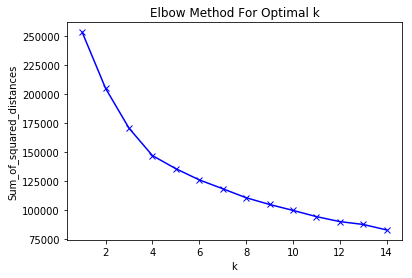

In [28]:
my_lib.elbow_method(x)

From the diagram above, there is a big turn in between cluster 4 to 6. So the optimal number of K clusters is 4

### Build model for K-means clustering

In [29]:
# Create KMeans object
model = KMeans(n_clusters=4)

# Execute data mining
model = model.fit(x)

# Display the square distance
model.inertia_

146897.03148191984

In [30]:
# Add the label back to the DataFrame
x_processing['cluster'] = model.labels_
x_processing.head()

,Hobbyist,NEWLearn,NEWOtherComms,SOComm,SOPartFreq,SOVisitFreq,Hobbyist_ord,NEWLearn_ord,NEWOtherComms_ord,SOComm_ord,SOPartFreq_ord,SOVisitFreq_ord,cluster
1,No,Once a year,No,"Yes, definitely",Less than once per month or monthly,Multiple times per day,0,2,0,4,1,4,2
2,Yes,Once a decade,No,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,1,0,0,3,2,3,3
3,Yes,Once a year,Yes,"Yes, definitely",A few times per month or weekly,Multiple times per day,1,2,1,4,2,4,0
4,Yes,Once a year,Yes,"Yes, somewhat",Less than once per month or monthly,A few times per month or weekly,1,2,1,3,1,1,1
5,No,Once a year,No,"Yes, somewhat",A few times per month or weekly,A few times per week,0,2,0,3,2,2,2


# Step 5 Evaluation

After k-means clustering, there are four groups of visitors. Let's review the segments.

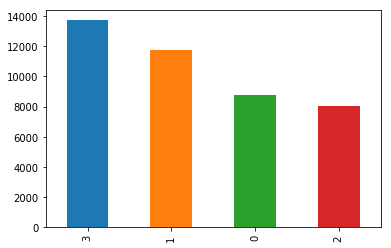

In [31]:
x_processing['cluster'].value_counts().plot(kind='bar') 

In [32]:
summary = x_processing.groupby('cluster').mean().round(2)
summary

,Hobbyist_ord,NEWLearn_ord,NEWOtherComms_ord,SOComm_ord,SOPartFreq_ord,SOVisitFreq_ord
cluster,,,,,,
0,0.94,2.20,0.45,3.48,3.14,3.55
1,1.00,2.19,1.00,2.13,0.94,2.47
2,0.00,1.82,0.32,2.11,1.07,2.60
3,1.00,2.08,0.00,1.87,0.86,2.56


#### Finally we got four clusters are generated and it seems no problem. It can then be analyzed in the next step.

In [33]:
# Save the summary result
summary.to_csv("project1_question_3_summary.csv")

# Step 6 Deploy (Communication)

After looking at the summary table, there are four types of visitors on StackOverflow, they are:

#### Cluster 0 - Stack Overflow super fans
People in this group are the most favourite geeks for Stack Overflow. They are geek because most of them are coding hobbyist, and half of them have membership on any other online developer communities. But that's not a big deal, most of them visit Stack Overflow and participate in Q&A daily. They also treat themselves as member of Stack Overflow community.

#### Cluster 1 - IT Geek but not tied to Stack Overflow
People in this group are hobbyist in coding. They all have membership on any other online developer communities (average of NEWOtherComms is 100%). But they just visit Stack Overflow and participate in Q&A sometimes. Seems they don't like Stack Overflow pretty much, or maybe they like the alternative developer communities more.

#### Cluster 2 - Not IT geek at all
People in this group are not hobbyist in coding at all. They don't often learn new technologies. And most of them don't have other online developer communities (only 32% of them have that). They usually visit Stack Overflow but not do so for answering Q&A. Seems they work in this field only for salary. They are not interested in IT or coding.

#### Cluster 3 - Stack Overflow fans with read-only
People in this group are geek and fans for Stack Overflow. They don't have membership on any other online developer communities at all. They keep usually visiting Stack Overflow. However, they don't often participate in Q&A. Seems they visit Stack Overflow for just getting what they want to know.



